# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_excel('geo.xlsx', index_col=0)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108806 entries, 0 to 108805
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   x              108806 non-null  float64
 1   y              108806 non-null  float64
 2   comment_class  108806 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 3.3 MB


In [4]:
data.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


In [5]:
data['comment_class'].value_counts()

-1    95147
 1    13659
Name: comment_class, dtype: int64

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

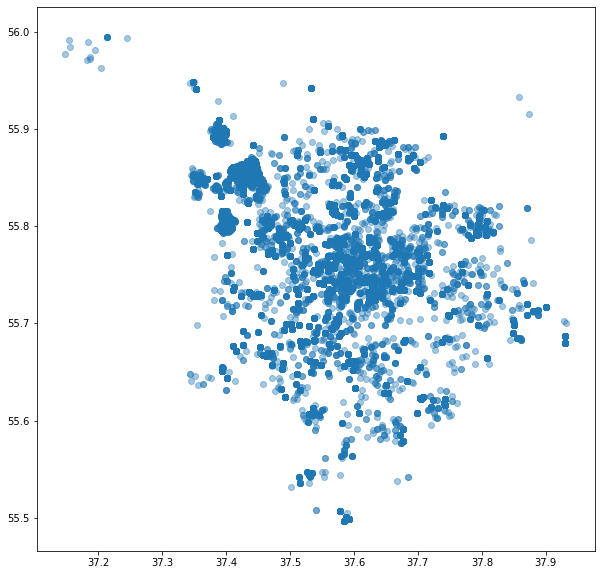

In [23]:
#визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)

x = data['x']
y = data['y']
plt.scatter(x, y, alpha=0.4)

In [24]:
from sklearn.cluster import KMeans

In [32]:
#выбираем 12 кластеров по числу округов
kmeans = KMeans(n_clusters=12, init = 'k-means++', max_iter=300)
clusters = kmeans.fit_predict(data[['x','y']])
centers = kmeans.cluster_centers_
cx = centers[:,0]
cy = centers[:,1]

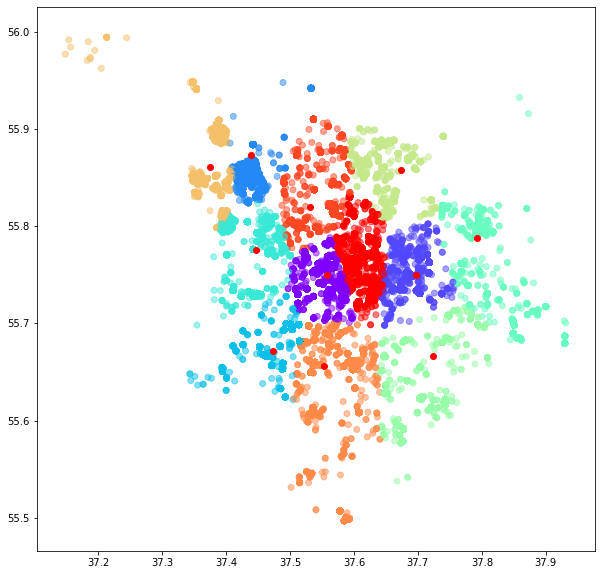

In [46]:
plt.scatter(x, y, c = clusters, cmap = 'rainbow', alpha=0.5)
plt.scatter(cx, cy, c='red')
plt.show()

In [7]:
#Аналогично исследовать скопления голосов за и против отдельно
data_za = data[data['comment_class'] == 1]
data_za.head()

,x,y,comment_class
28,37.588916,55.741982,1
45,37.589311,55.734273,1
46,37.558526,55.728758,1
47,37.566431,55.731794,1
61,37.589311,55.734273,1


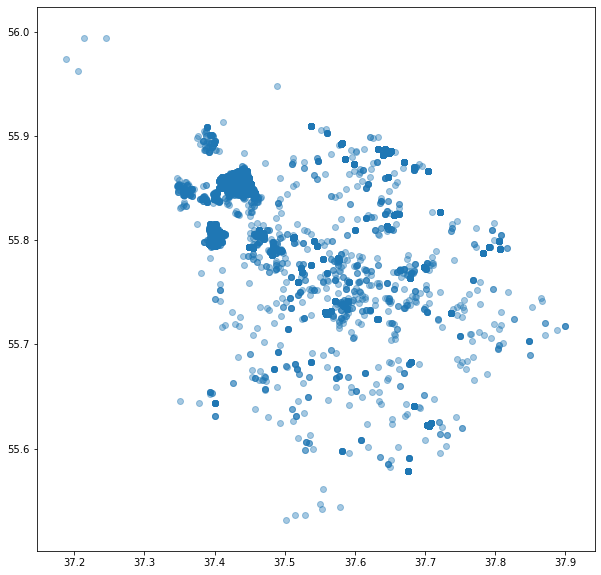

In [12]:
x_za = data_za['x']
y_za = data_za['y']
plt.scatter(x_za, y_za, alpha=0.4)

In [49]:
kmeans = KMeans(n_clusters=12, init = 'k-means++', max_iter=300)
clusters = kmeans.fit_predict(data_za[['x','y']])
centers = kmeans.cluster_centers_
cx = centers[:,0]
cy = centers[:,1]

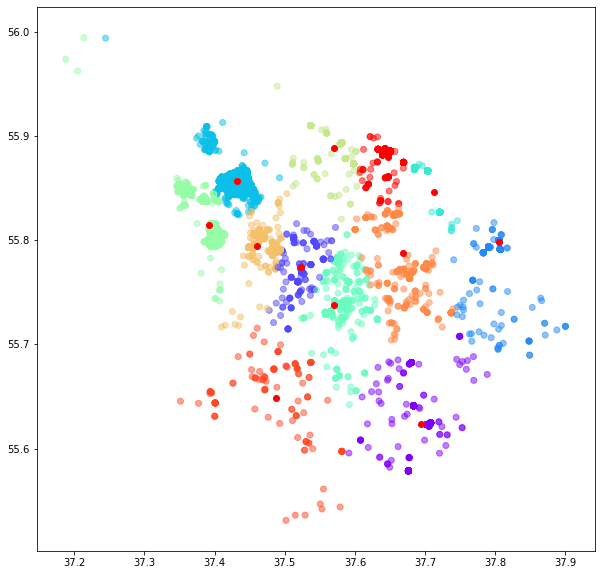

In [51]:
#Кластеризация голосов "ЗА"
plt.scatter(x_za, y_za, c = clusters, cmap = 'rainbow', alpha=0.5)
plt.scatter(cx, cy, c='red')
plt.show()

In [9]:
#а теперь голоса "против"
data_protiv = data[data['comment_class'] == -1]
data_protiv.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


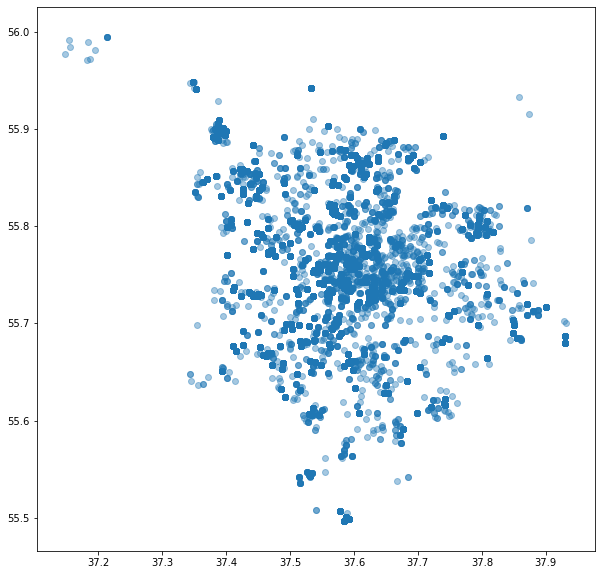

In [10]:
x_protiv = data_protiv['x']
y_protiv = data_protiv['y']
plt.scatter(x_protiv, y_protiv, alpha=0.4)

In [56]:
kmeans = KMeans(n_clusters=12, init = 'k-means++', max_iter=300)
clusters = kmeans.fit_predict(data_protiv[['x','y']])
centers = kmeans.cluster_centers_
cx = centers[:,0]
cy = centers[:,1]

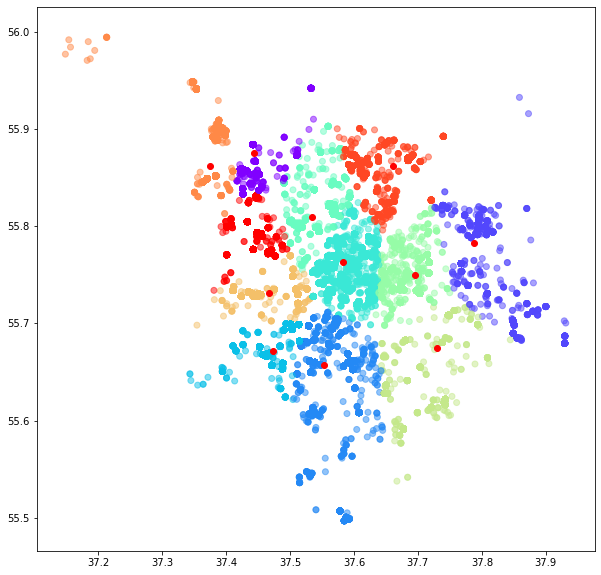

In [57]:
plt.scatter(x_protiv, y_protiv, c = clusters, cmap = 'rainbow', alpha=0.5)
plt.scatter(cx, cy, c='red')
plt.show()

In [63]:
#подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)
k_inertia = []
ks = range(1,12)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data[['x','y']], )
    k_inertia.append(clf_kmeans.inertia_)

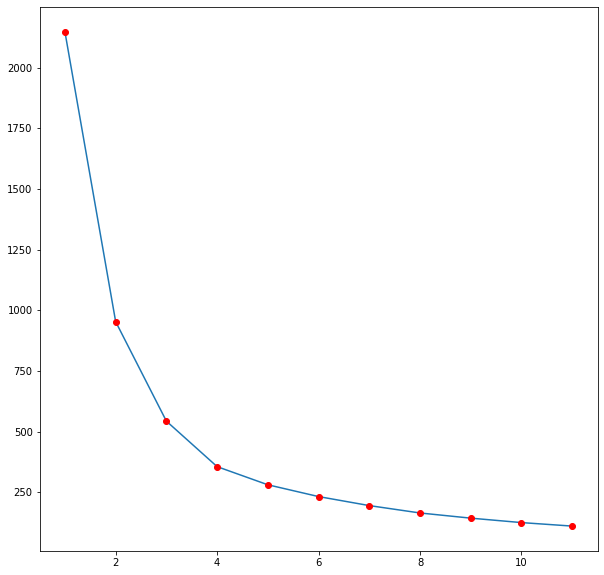

In [64]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

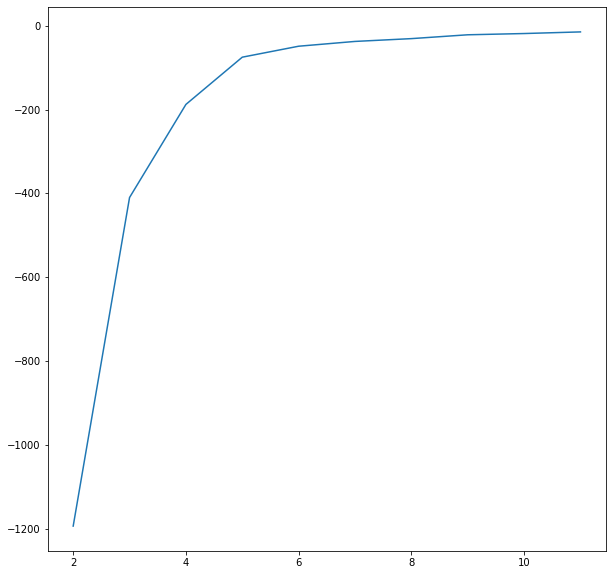

In [65]:
diff = np.diff(k_inertia)
plt.plot(ks[1:], diff)

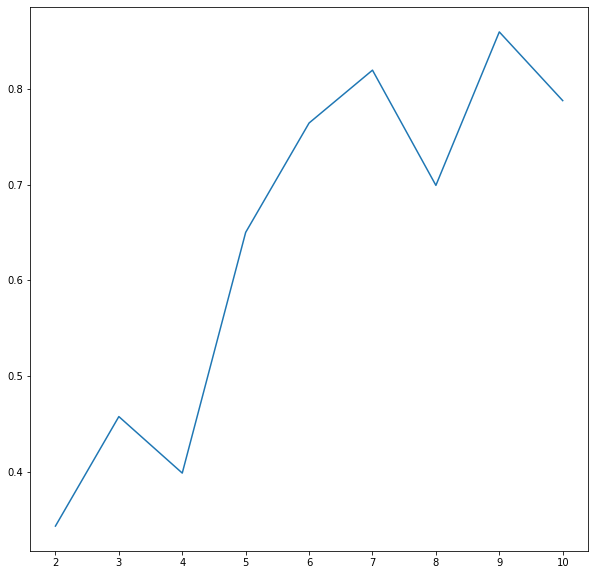

In [66]:
diff_r = diff[1:] / diff[:-1]
plt.plot(ks[1:-1], diff_r)

In [67]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

2

In [5]:
#найти наиболее активные в голосовании районы 
#(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')

In [1]:
from sklearn.cluster import DBSCAN

In [8]:
dbscan = DBSCAN (eps = 0.2)
clusters = dbscan.fit_predict(data_za[['x','y']])

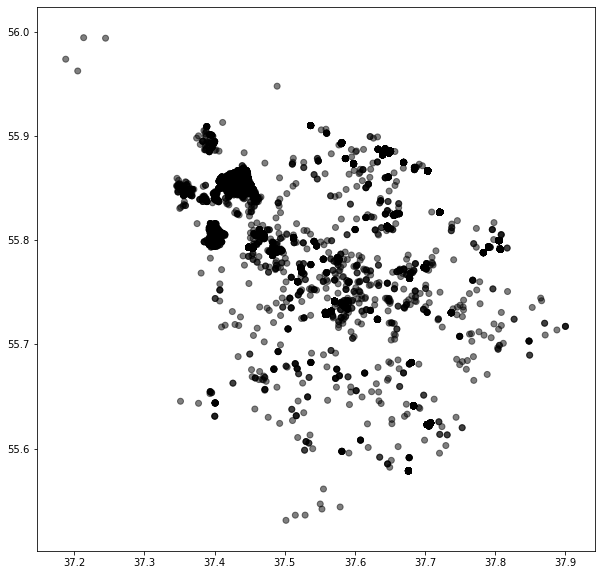

In [17]:
plt.scatter(data_za[['x','y']].x, data_za[['x','y']].y, c=clusters, cmap='gray', alpha=0.5)